In [46]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
np.__version__

'1.16.2'

# Singular Value Decomposition (SVD)

The purpose of this notebook is to demonstrate image compression with SVD. It's certainly not the best method to compress images, yet it gives a very interesting look at how SVD works.

In [11]:
# Get path
with open('path.txt', 'r') as f:
    path = f.readline()

# Read an image of choice as gray-scale.
img = imread(path, 0)

In [12]:
img.shape

(3000, 4000)

In [56]:
# View the image
def show_img(img):
    plt.figure(figsize = (10, 7.5))
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=255, aspect = 'auto')
    plt.axis('off')
    plt.show()

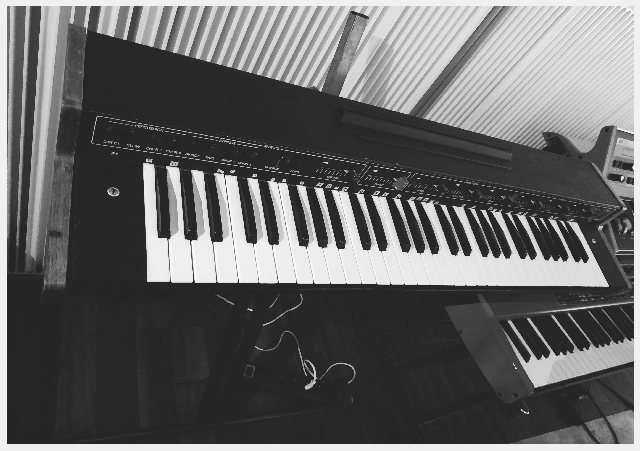

In [57]:
show_img(img)

## SVD

Now, let's apply SVD...

In [84]:
U, S, V_T = np.linalg.svd(img)

and display images based on various numbers of highest sigmas:

In [85]:
# Sigma dimensionality
U.shape, S.shape, V_T.shape

((3000, 3000), (3000,), (4000, 4000))

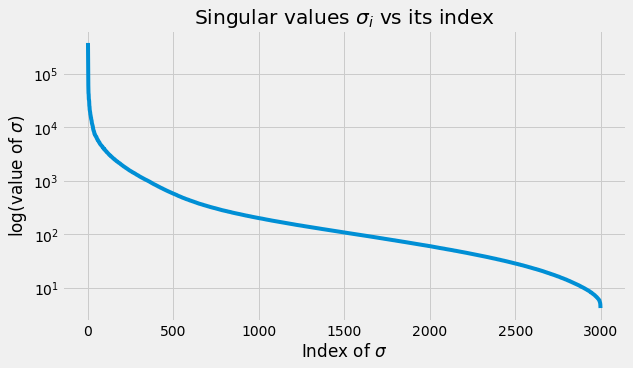

In [59]:
# Plot sigmas
plt.figure(figsize = (9, 5))
plt.plot(np.arange(S.shape[0]), S)
plt.yscale('log')
plt.xlabel('Index of $\sigma$')
plt.ylabel('log(value of $\sigma$)')
plt.title('Singular values $\sigma_i$ vs its index')
plt.show()

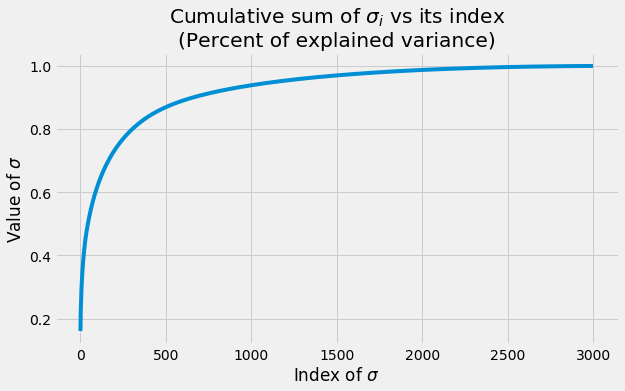

In [63]:
# Plot cumsum of sigma
plt.figure(figsize = (9, 5))
plt.plot(np.cumsum(S) / sum(S))
plt.xlabel('Index of $\sigma$')
plt.ylabel('Value of $\sigma$')
plt.title('Cumulative sum of $\sigma_i$ vs its index\n(Percent of explained variance)')
plt.show()

## Reverse SVD 

In [87]:
# Create an empty matrix to fill with sigma values (np.lialg.svd returns sigma as an array)
S_full = np.zeros((U.shape[0], V_T.shape[0]))

In [88]:
S_full.shape

(3000, 4000)

In [92]:
# Populate sigma matrix
S_diag = np.diag(S)
S_full[:S_diag.shape[0], :S_diag.shape[1]] = S_diag

5



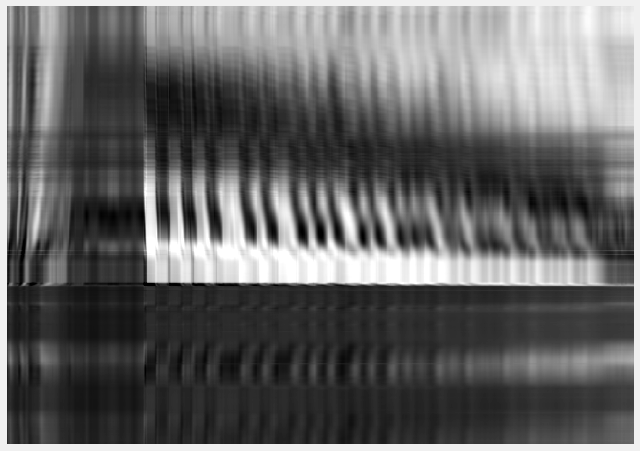

----------------------------------------------------------------------------------------------------

10



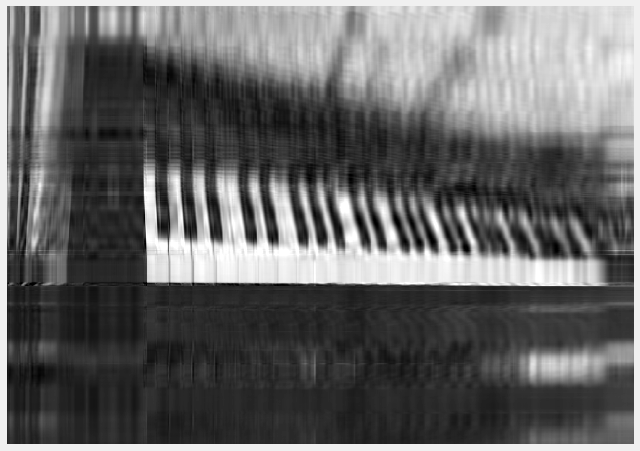

----------------------------------------------------------------------------------------------------

25



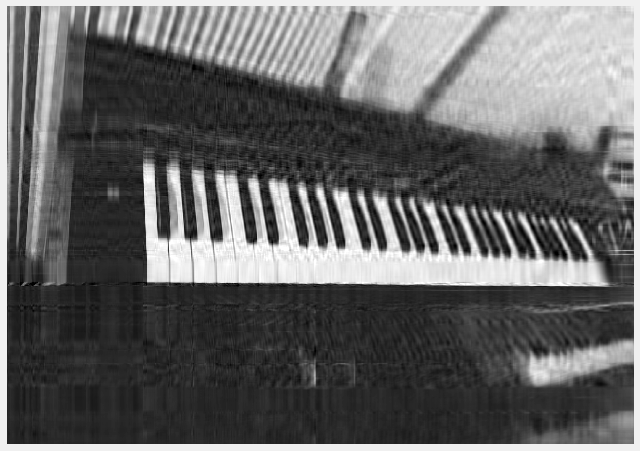

----------------------------------------------------------------------------------------------------

50



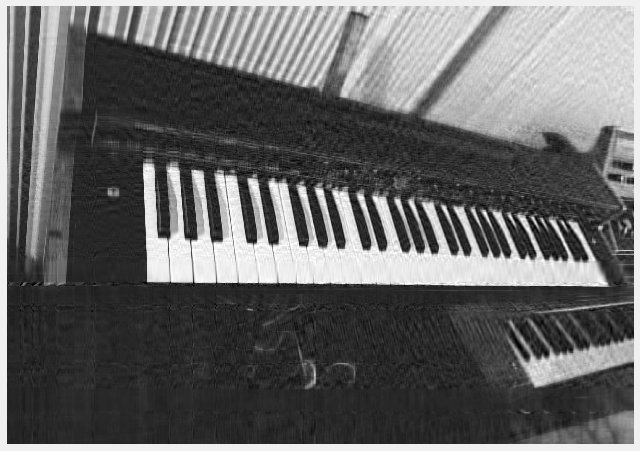

----------------------------------------------------------------------------------------------------

100



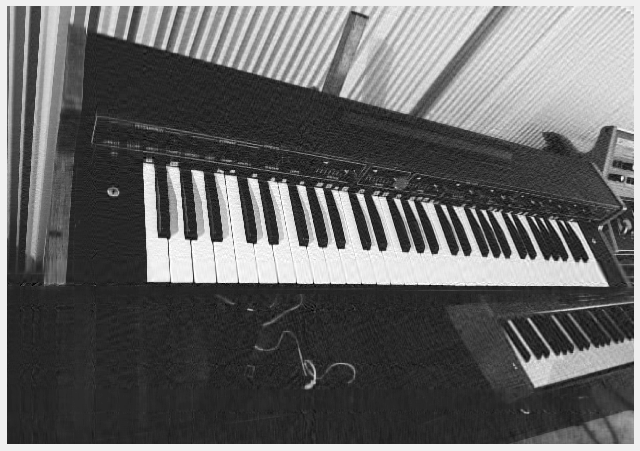

----------------------------------------------------------------------------------------------------

200



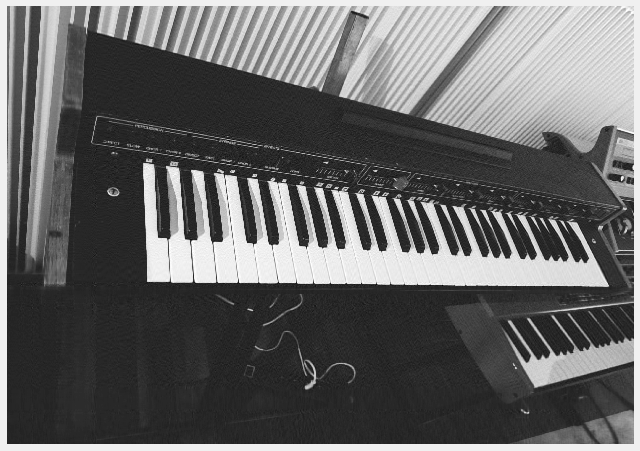

----------------------------------------------------------------------------------------------------

3000



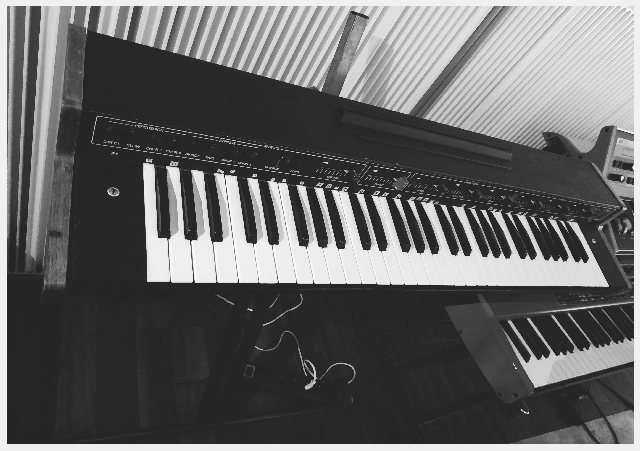

----------------------------------------------------------------------------------------------------



In [100]:
for i in [5, 10, 25, 50, 100, 200, U.shape[0]]:
    print(str(i) + '\n')
    show_img(U[:, :i].dot(S_full[:i, :i].dot(V_T[:i, :])))
    print('-' * 100 + '\n')